In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

# Make helper functions to extract excel data and plot impedance

In [2]:
def get_files(prefix):
    mypath = os.getcwd() + "/" + prefix
    list_of_files = [prefix + f for f in listdir(mypath) if isfile(join(mypath, f))]
    return np.sort(list_of_files)

def make_excel_array(fname, show_data=False):
    pandas = pd.read_excel(fname)
    full_array = np.array(pandas).T
    
    # show contents of excel file
    if show_data:
        print(pandas)
    
    # index 6: frequency (Hz)  
    # index 4: Z(omega) = magnitude of impedance
    # index 5 = phase!
    
    
    return [full_array[6], full_array[4], full_array[4]]

def plot_sample(file_list, electrode_name, color='o', label=""):
    # makes a plot of relevant electrodes e.g. electrode1
    # specify color b, r, c, m, y, b, w
    label_flag = True
    for fname in file_list:
        if electrode_name in fname:
            vals = make_excel_array(fname)
            if(label_flag):
                label_flag = False
                plt.plot(vals[0], vals[1], color, label=label)
                plt.plot(vals[0], vals[2], "x", label=label + " phase")
#                 plt.plot(vals[0], vals[1], color, label=label)
            else:
#                 plt.plot(vals[0], vals[1], color)
                plt.plot(vals[0], vals[1], color)
                plt.plot(vals[0], vals[2], "x")
        
def format_log_plot():
    plt.yscale('log')
    plt.xscale('log')
    
def plot_single_sample(fname,title=""):
    vals = make_excel_array(fname)
    plt.plot(vals[0], vals[1],'o')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance Z(Ω) [Ohms]")
    plt.title(title)
    plt.show()
    
def plot_electrodes(file_list, color='o', label=""):
    # specify color b, r, c, m, y, b, w
    label_flag = True
    for fname in file_list:
#         if electrode_name in fname:
        vals = make_excel_array(fname)
        if(label_flag):
            label_flag = False
            plt.plot(vals[0], vals[1], color, label=label)
            plt.plot(vals[0], vals[2], "x", label=label + " phase")
#                 plt.plot(vals[0], vals[1], color, label=label)
        else:
#                 plt.plot(vals[0], vals[1], color)
            plt.plot(vals[0], vals[1], color)
            plt.plot(vals[0], vals[2], "x")

# sample files:
# fname = 'electrode1-8mm-left.xlsx'

In [19]:
time_points = [0, 12, 24, 36, 48, 60, 72, 84, 108, 132, 156]
electrode_areas = np.array([50*50, 50*50, 100*100, 100*100, 250*250, 250*250])/(10000*10000) # convert to cm^2

soak_data = [
    [315432, 140084, 61763.9, 87909.6, 21359, 33934.9],
    [36300.6, 20214.2, 15768.8, 28530.6, 9163.26, 7064.38],
    [31495.9, 18709.4, 14413.6, 23564, 9412.18, 8740.88],
    [28445.7, 16398, 13501.9, 20136.2, 7482.51, 7332.28],
    [27218.7, 15984.6, 13127.7, 20888.8,  6944.23, 7068],
    [24125.5, 14561, 12903.3, 18075.1, 7915.54, 7269.55],
    [31030.5, 18483.9, 17429, 25899.4, 11595.2, 9875.02],
    [32973.3, 18283.5, 17454.9, 27872.1, 12622.3, 10249.4],
    [43327.4, 13300.8, 16607.7, 31298.46, 9854.21, 10504.1],
    [25450.9, 17849.6, 18192.7, 27544.7, 11454, 9439.75],
    [25893.5, 16120.6, 11261.18, 19719.4, 9299.3, 7157.28]
]

scaled_soak_data = [
    [315432, 140084, 61763.9, 87909.6, 21359, 33934.9],
    [36300.6, 20214.2, 15768.8, 28530.6, 9163.26, 7064.38],
    [31495.9, 18709.4, 14413.6, 23564, 9412.18, 8740.88],
    [28445.7, 16398, 13501.9, 20136.2, 7482.51, 7332.28],
    [27218.7, 15984.6, 13127.7, 20888.8,  6944.23, 7068],
    [24125.5, 14561, 12903.3, 18075.1, 7915.54, 7269.55],
    [31030.5, 18483.9, 17429, 25899.4, 11595.2, 9875.02],
    [32973.3, 18283.5, 17454.9, 27872.1, 12622.3, 10249.4],
    [43327.4, 13300.8, 16607.7, 31298.46, 9854.21, 10504.1],
    [25450.9, 17849.6, 18192.7, 27544.7, 11454, 9439.75],
    [25893.5, 16120.6, 11261.18, 19719.4, 9299.3, 7157.28]
]


print(len(time_points))
print(len(soak_data))

11
11


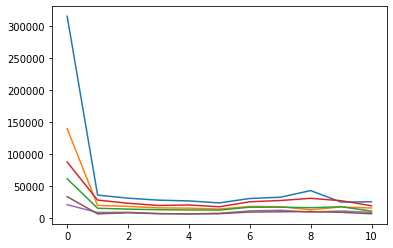

In [62]:
plt.plot(soak_data)
plt.show()

In [20]:
for t in range(len(time_points)):
    for i in range(len(electrode_areas)):
        scaled_soak_data[t][i] = scaled_soak_data[t][i]*electrode_areas[i]
        

In [40]:
len(scaled_soak_data)
scaled_soak_data[0]

[7.885800000000001,
 3.5021,
 6.1763900000000005,
 8.790960000000002,
 13.349375,
 21.209312500000003]

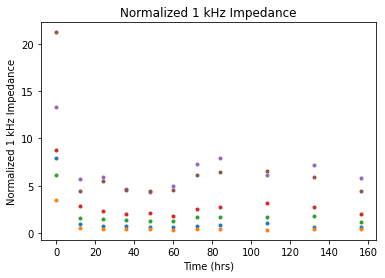

In [25]:
plt.plot(time_points, scaled_soak_data,".")
plt.title("Normalized 1 kHz Impedance")
plt.xlabel("Time (hrs)")
plt.ylabel("Normalized 1 kHz Impedance")
plt.show()

In [60]:
data_by_time = np.array(scaled_soak_data).T
np.mean(data_by_time[0:2], axis = 0)

np.mean(data_by_time[0:2], axis=0)

array([5.69395   , 0.706435  , 0.62756625, 0.56054625, 0.54004125,
       0.48358125, 0.61893   , 0.64071   , 0.7078525 , 0.54125625,
       0.52517625])

In [183]:
data_by_time_unnorm = np.array(soak_data).T
# np.mean(data_by_time[0:2], axis = 0)

# np.mean(data_by_time[0:2], axis=0)

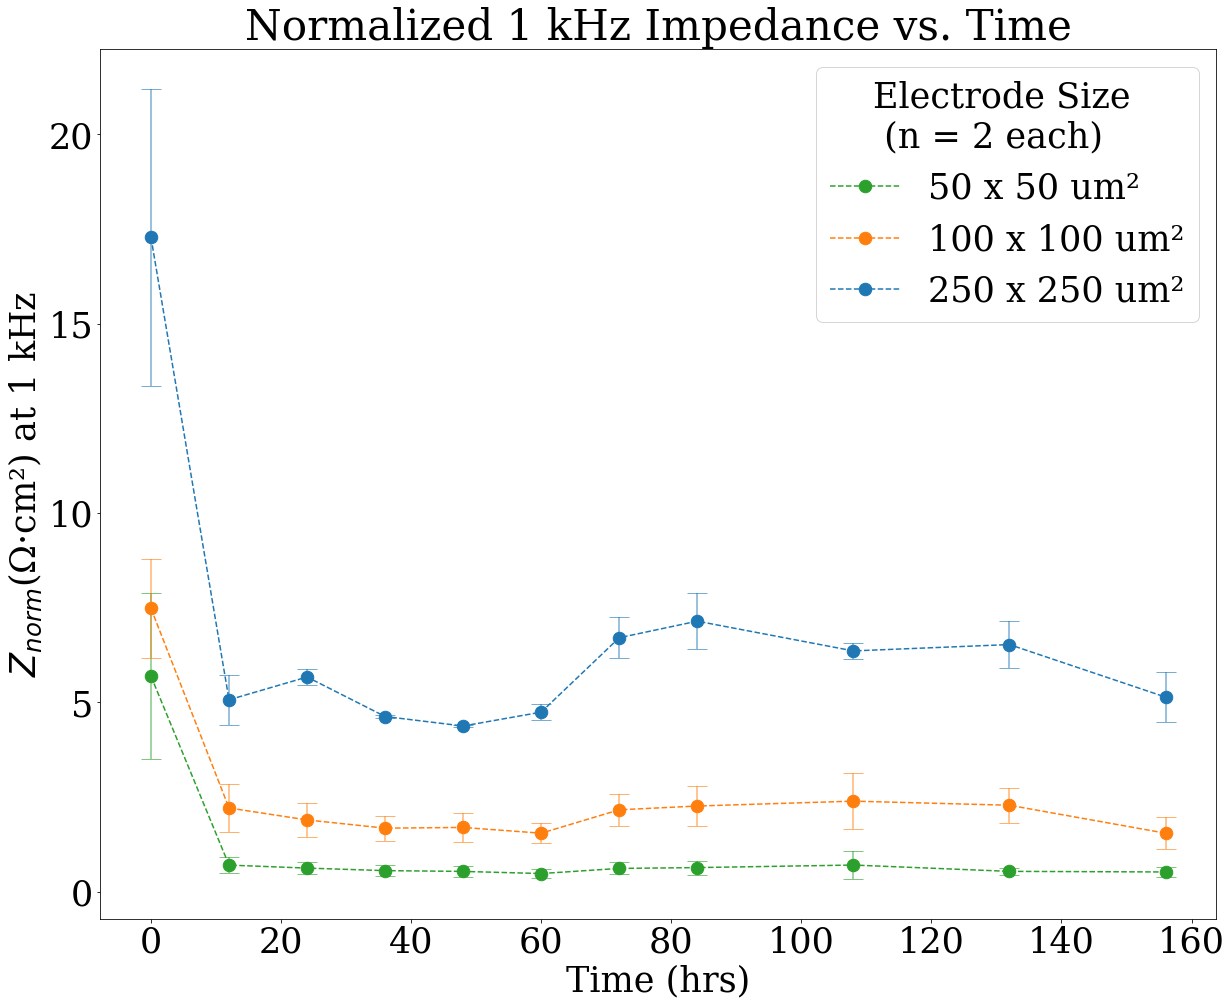

In [173]:
plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "serif"
ms = 25
cs = 10


# 50 um electrodes

i1 = 0
i2 = 1
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:green"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="50 x 50 um²", markersize = ms)

# 100 um electrodes

i1 = 2
i2 = 3
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:orange"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="100 x 100 um²", markersize = ms)


# 250 um electrodes

i1 = 4
i2 = 5
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:blue"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="250 x 250 um²", markersize = ms)

# labels
plt.legend(title="Electrode Size \n (n = 2 each)")
plt.title("Normalized 1 kHz Impedance vs. Time")
plt.xlabel("Time (hrs)")
plt.ylabel("$Z_{norm}$(Ω·cm²) at 1 kHz")

# plt.savefig("znorm_corrected_area.png",dpi=600)

plt.show()

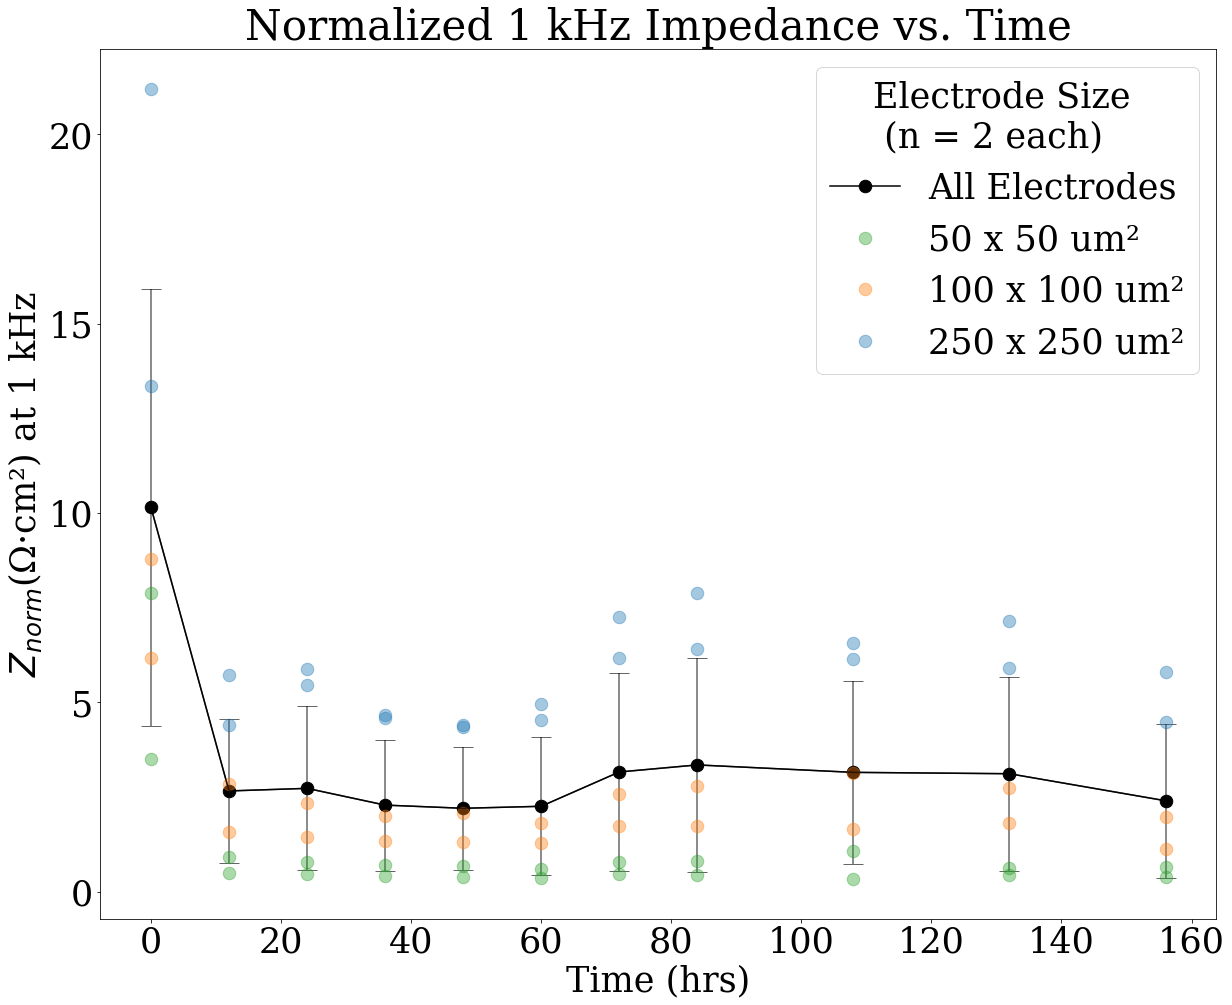

In [169]:
plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "serif"
ms = 25
cs = 10


# All electrodes

avg = np.mean(data_by_time, axis=0)
std = np.std(data_by_time, axis=0)
color = "black"

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
plt.plot(time_points, avg,".-", color = color, label="All Electrodes", markersize = ms)


# 50 um electrodes

i1 = 0
i2 = 1
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:green"

i = i1
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="50 x 50 um²")
i = i2
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="")

# plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
# plt.plot(time_points, avg,".-", color = color, label="50 x 50 um²", markersize = ms)

# 100 um electrodes

i1 = 2
i2 = 3
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:orange"

i = i1
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="100 x 100 um²")
i = i2
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="")

# plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
# plt.plot(time_points, avg,".-", color = color, label="100 x 100 um²", markersize = ms)


# 250 um electrodes

i1 = 4
i2 = 5
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:blue"

i = i1
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="250 x 250 um²")
i = i2
plt.plot(time_points, data_by_time[i],".", color = color, alpha=0.4, linewidth=2, markersize = ms,label="")

# plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
# plt.plot(time_points, avg,".-", color = color, label="250 x 250 um²", markersize = ms)

# labels
plt.legend(title="Electrode Size \n (n = 2 each)")
plt.title("Normalized 1 kHz Impedance vs. Time")
plt.xlabel("Time (hrs)")
plt.ylabel("$Z_{norm}$(Ω·cm²) at 1 kHz")
# plt.ylim([0, 17])

# plt.savefig("znorm_all_single_points.png", dpi = 600)

plt.show()



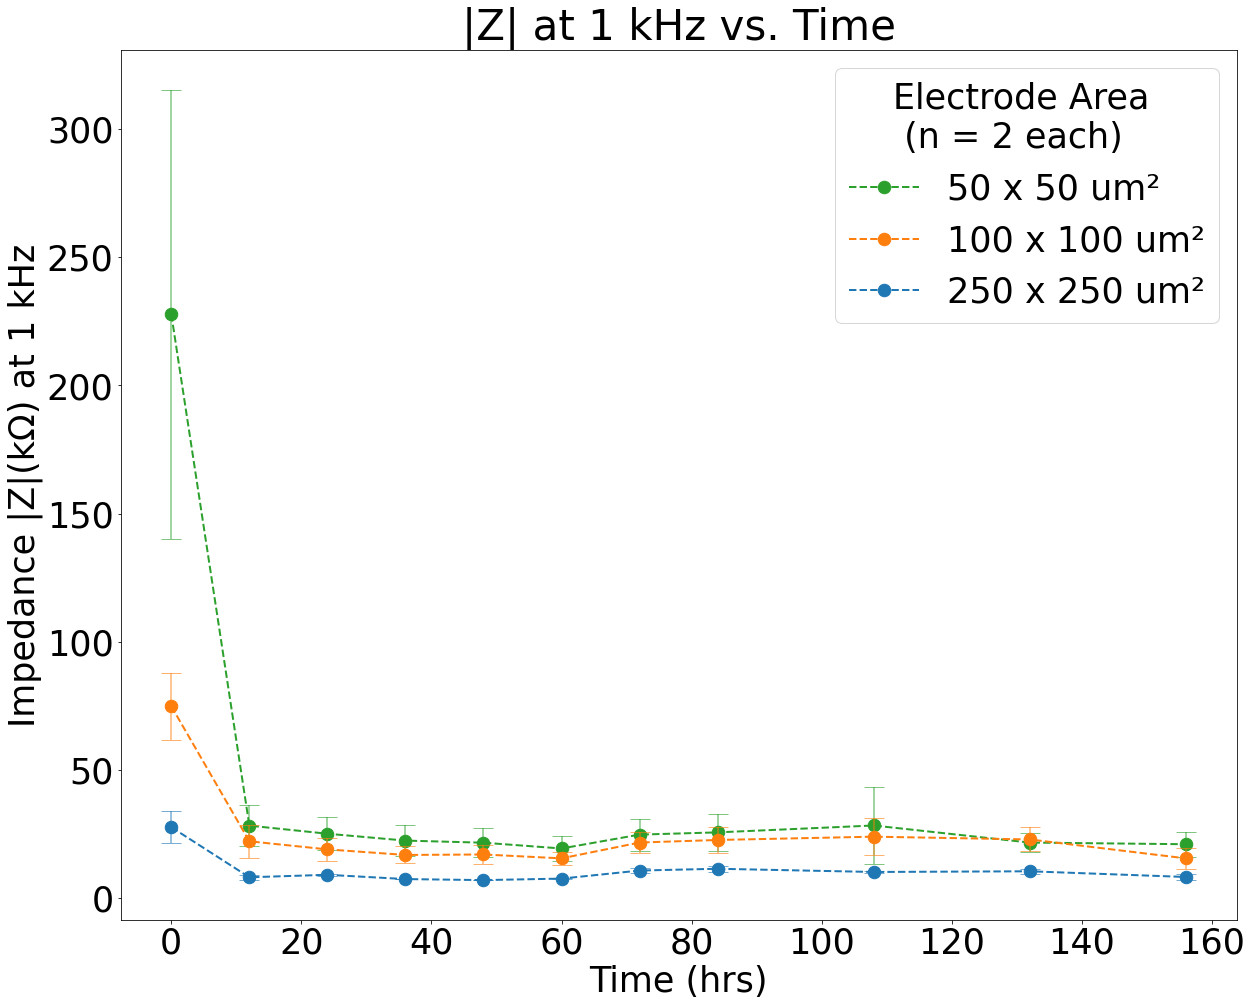

In [207]:
data_by_time_unnorm_scale = data_by_time_unnorm/1000

plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "sanserif"
ms = 25
cs = 10
lw = 2


# 50 um electrodes

i1 = 0
i2 = 1
avg = np.mean(data_by_time_unnorm_scale[i1:i2+1], axis=0)
std = np.std(data_by_time_unnorm_scale[i1:i2+1], axis=0)
color = "tab:green"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time_unnorm_scale[i],".", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="50 x 50 um²", markersize = ms, linewidth = lw)

# 100 um electrodes

i1 = 2
i2 = 3
avg = np.mean(data_by_time_unnorm_scale[i1:i2+1], axis=0)
std = np.std(data_by_time_unnorm_scale[i1:i2+1], axis=0)
color = "tab:orange"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time_unnorm_scale[i],".", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="100 x 100 um²", markersize = ms, linewidth = lw)


# 250 um electrodes

i1 = 4
i2 = 5
avg = np.mean(data_by_time_unnorm_scale[i1:i2+1], axis=0)
std = np.std(data_by_time_unnorm_scale[i1:i2+1], axis=0)
color = "tab:blue"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time_unnorm_scale[i],".", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="250 x 250 um²", markersize = ms, linewidth = lw)

# labels
plt.legend(title="Electrode Area \n (n = 2 each)")
plt.title("|Z| at 1 kHz vs. Time")
plt.xlabel("Time (hrs)")
plt.ylabel("Impedance |Z|(kΩ) at 1 kHz")
# plt.yscale('log')

# plt.savefig("z_vs_time.png",dpi=600)

plt.show()

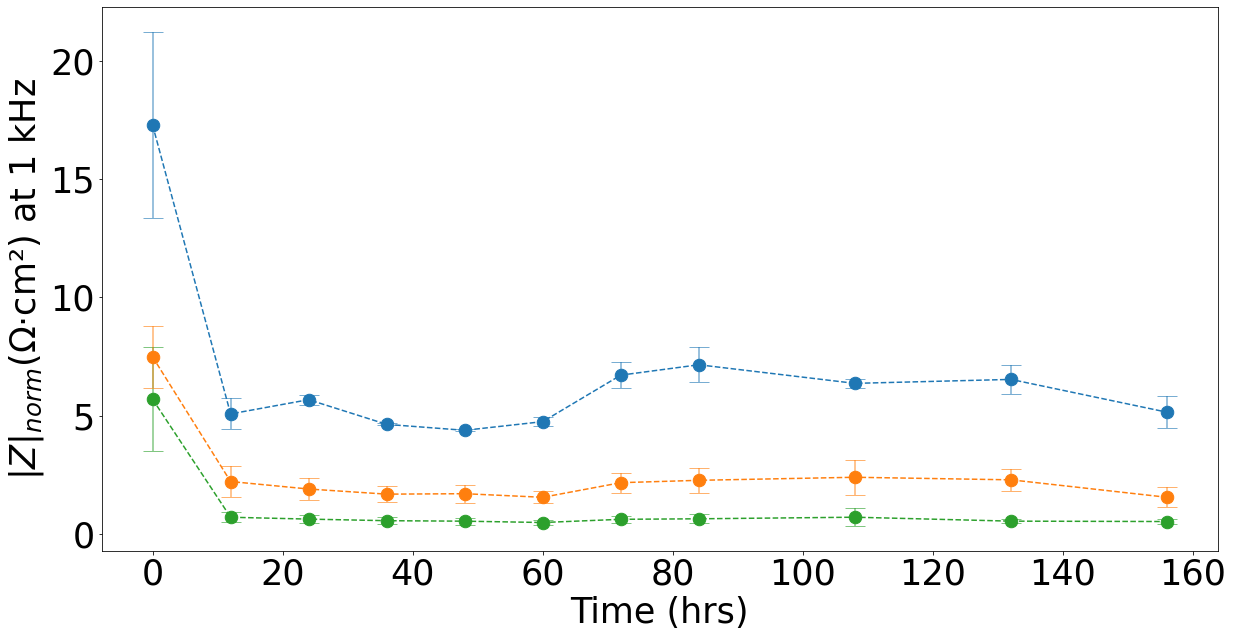

In [208]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "sanserif"
ms = 25
cs = 10


# 50 um electrodes

i1 = 0
i2 = 1
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:green"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="50 x 50 um²", markersize = ms)

# 100 um electrodes

i1 = 2
i2 = 3
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:orange"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="100 x 100 um²", markersize = ms)


# 250 um electrodes

i1 = 4
i2 = 5
avg = np.mean(data_by_time[i1:i2+1], axis=0)
std = np.std(data_by_time[i1:i2+1], axis=0)
color = "tab:blue"

# for i in [i1,i2]:
#     plt.plot(time_points, data_by_time[i],".-", color = color, alpha=0.4, linewidth=5)

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6,linestyle='')
plt.plot(time_points, avg,".--", color = color, label="250 x 250 um²", markersize = ms)

# labels
# plt.legend(title="Electrode Size \n (n = 2 each)")
# plt.title("Normalized 1 kHz Impedance vs. Time")
# plt.title("$|Z|_{norm}$ at 1 kHz vs. Time")
plt.xlabel("Time (hrs)")
plt.ylabel("$|Z|_{norm}$(Ω·cm²) at 1 kHz")

# plt.savefig("znorm_inset.png",dpi=600)

plt.show()

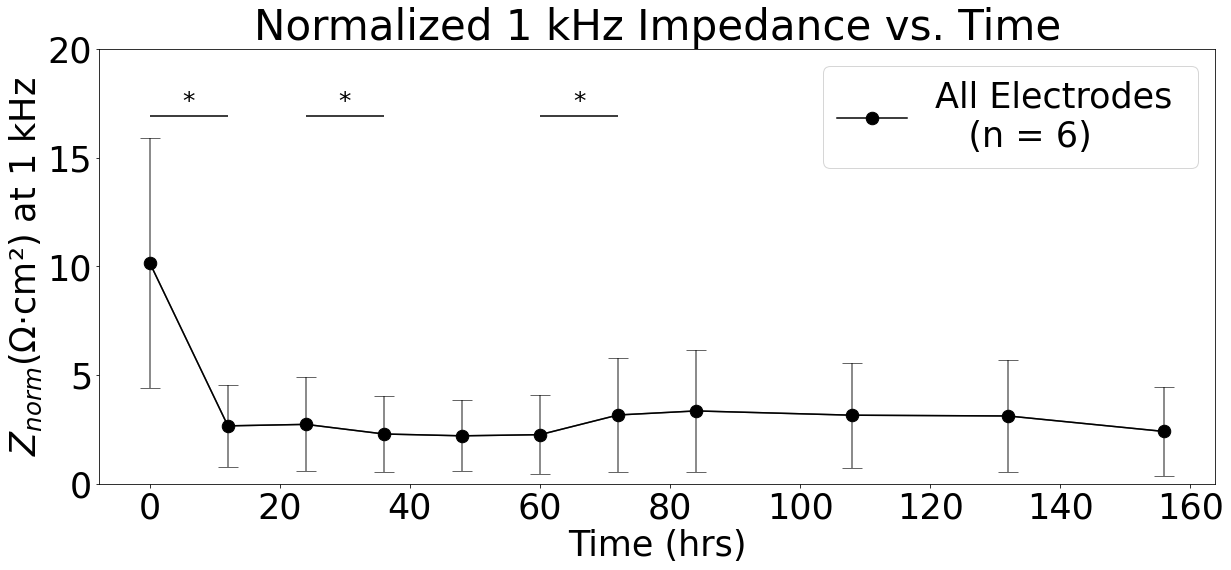

In [168]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "sanserif"
ms = 25
cs = 10


# All electrodes

avg = np.mean(data_by_time, axis=0)
std = np.std(data_by_time, axis=0)
color = "black"

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
plt.plot(time_points, avg,".-", color = color, label="All Electrodes \n   (n = 6)", markersize = ms)


y_base = avg + std
for t in range(len(time_points)-1):
    draw_horizontal_sig_bar(time_points[t], time_points[t+1], y_base[0]+1, sig_comparison[t], text_height=0.1)


# labels
plt.legend(title="")
plt.title("Normalized 1 kHz Impedance vs. Time")
plt.xlabel("Time (hrs)")
plt.ylabel("$Z_{norm}$(Ω·cm²) at 1 kHz")
plt.ylim([0, 20])

# plt.savefig("znorm_sig.png", dpi=600)

plt.show()




In [137]:
y_base = avg + std

y_base

array([15.91863461,  4.55325436,  4.89720078,  4.01980806,  3.83173721,
        4.08137919,  5.78126764,  6.16749764,  5.5752368 ,  5.67460688,
        4.43894873])

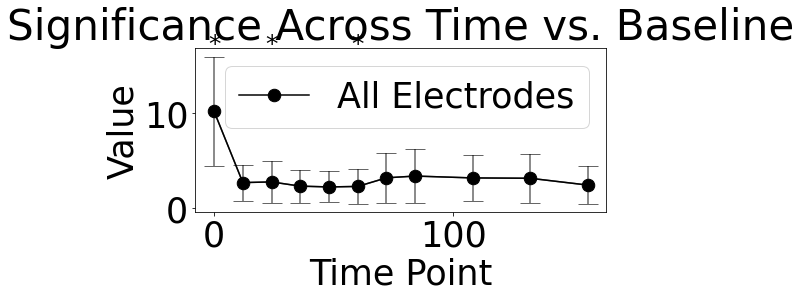

In [156]:
import numpy as np

# Plot data
plt.figure(figsize=(8, 5))

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
plt.plot(time_points, avg,".-", color = color, label="All Electrodes", markersize = ms)

plt.xlabel("Time Point")
plt.ylabel("Value")
plt.title("Significance Across Time vs. Baseline")

# Draw horizontal significance bars
def draw_horizontal_sig_bar(x1, x2, y, p_val, text_height=0.01):
    """Draw horizontal significance bar with asterisks above it."""
    if p_val < 0.05:
        stars = "*" if p_val < 0.05 and p_val >= 0.01 else "**" if p_val < 0.01 and p_val >= 0.001 else "***"
        plt.hlines(y, x1, x2, color='black')
        plt.text((x1 + x2) / 2, y + text_height, stars, ha='center', va='bottom', fontsize=25)

# Add bars above the highest error bar
y_base = max(avg + std)

for t in range(len(time_points)-1):
    draw_horizontal_sig_bar(time_points[t], time_points[t], int(y_base) + 1, sig_comparison[t], text_height=0.01)

# spacing = 0.05
# for i, (x1, x2, p) in enumerate(p_values):
#     draw_horizontal_sig_bar(x1, x2, y_base + spacing * (i + 1), p)

# plt.ylim([0.8, y_base + spacing * (len(p_values) + 2)])
plt.tight_layout()
plt.legend()
plt.show()


In [130]:
time_points

[0, 12, 24, 36, 48, 60, 72, 84, 108, 132, 156]

In [ ]:
plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 35})
plt.rcParams["font.family"] = "sanserif"
ms = 25
cs = 10


# All electrodes

avg = np.mean(data_by_time, axis=0)
std = np.std(data_by_time, axis=0)
color = "black"

plt.errorbar(time_points, avg, std, color=color, capsize=cs,alpha=0.6)
plt.plot(time_points, avg,".-", color = color, label="All Electrodes", markersize = ms)

# labels
plt.legend(title="Electrode Size \n (n = 2 each)")
plt.title("Normalized 1 kHz Impedance All Electrodes")
plt.xlabel("Time (hrs)")
plt.ylabel("Normalized 1 kHz Impedance")
plt.show()

In [100]:
scaled_soak_data[i][0:2]

[0.6804675, 0.39961500000000005]

In [127]:
from scipy.stats import wilcoxon

# Electrode size 50
sig_comparison = []

for i in range(len(scaled_soak_data)-1):
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(scaled_soak_data[i], scaled_soak_data[i+1])
    sig_comparison.append(p_value)

print("Wilcoxon signed-rank statistic:", stat)
print("p-value:", p_value)

print("Electrode Size 50um")
print(sig_comparison)

Wilcoxon signed-rank statistic: 1.0
p-value: 0.0625
Electrode Size 50um
[0.03125, 1.0, 0.03125, 0.21875, 1.0, 0.03125, 0.09375, 0.84375, 0.84375, 0.0625]


In [103]:
from scipy.stats import wilcoxon

# Electrode size 50
i1 = 0
i2 = 1

sig_comparison = []

for i in range(len(scaled_soak_data)-1):
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(scaled_soak_data[i][i1:i2+1], scaled_soak_data[i+1][i1:i2+1])
    sig_comparison.append(p_value)

print("Wilcoxon signed-rank statistic:", stat)
print("p-value:", p_value)

print("Electrode Size 50um")
print(sig_comparison)

Wilcoxon signed-rank statistic: 1.0
p-value: 1.0
Electrode Size 50um
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0]


In [104]:
from scipy.stats import wilcoxon

# Electrode size 100
i1 = 2
i2 = 3

sig_comparison = []

for i in range(len(scaled_soak_data)-1):
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(scaled_soak_data[i][i1:i2+1], scaled_soak_data[i+1][i1:i2+1])
    sig_comparison.append(p_value)

print("Wilcoxon signed-rank statistic:", stat)
print("p-value:", p_value)

print("Electrode Size 100 um")
print(sig_comparison)

Wilcoxon signed-rank statistic: 0.0
p-value: 0.5
Electrode Size 100 um
[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5]


In [105]:
from scipy.stats import wilcoxon

# Electrode size 250
i1 = 4
i2 = 5

sig_comparison = []

for i in range(len(scaled_soak_data)-1):
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(scaled_soak_data[i][i1:i2+1], scaled_soak_data[i+1][i1:i2+1])
    sig_comparison.append(p_value)

print("Wilcoxon signed-rank statistic:", stat)
print("p-value:", p_value)

print("Electrode Size 250 um")
print(sig_comparison)

Wilcoxon signed-rank statistic: 0.0
p-value: 0.5
Electrode Size 250 um
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5]


In [106]:
from scipy.stats import wilcoxon

# Electrode size 250
i1 = 0
i2 = 5

sig_comparison = []

for i in range(len(scaled_soak_data)-1):
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(scaled_soak_data[i][i1:i2+1], scaled_soak_data[i+1][i1:i2+1])
    sig_comparison.append(p_value)

print("Wilcoxon signed-rank statistic:", stat)
print("p-value:", p_value)

print("Electrode Size 250 um")
print(sig_comparison)

Wilcoxon signed-rank statistic: 1.0
p-value: 0.0625
Electrode Size 250 um
[0.03125, 1.0, 0.03125, 0.21875, 1.0, 0.03125, 0.09375, 0.84375, 0.84375, 0.0625]


['gold-better/gold-probe-1-electrode-6-again.xlsx'
 'gold-better/gold-probe-1-electrode-6.xlsx'
 'gold-better/gold-probe-1-electrode-7-again.xlsx'
 'gold-better/gold-probe-1-electrode-7.xlsx'
 'gold-better/gold-probe-2-electrode-1-inscopix-again-2.xlsx'
 'gold-better/gold-probe-2-electrode-1-inscopix-again.xlsx'
 'gold-better/gold-probe-2-electrode-1-inscopix.xlsx'
 'gold-better/gold-probe-2-electrode-2-inscopix-again.xlsx'
 'gold-better/gold-probe-2-electrode-2-inscopix.xlsx'
 'gold-better/gold-probe-2-electrode-3-inscopix-again.xlsx'
 'gold-better/gold-probe-2-electrode-3-inscopix.xlsx']
['silver-better/silver-probe-3-electrode-1-again.xlsx'
 'silver-better/silver-probe-3-electrode-1.xlsx'
 'silver-better/silver-probe-3-electrode-3-again.xlsx'
 'silver-better/silver-probe-3-electrode-3.xlsx'
 'silver-better/silver-probe-3-electrode-5-again.xlsx'
 'silver-better/silver-probe-3-electrode-5.xlsx'
 'silver-better/silver-probe-3-electrode-7-chipped-again.xlsx'
 'silver-better/silver-probe

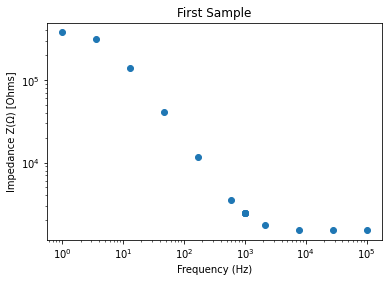

In [4]:
prefix = "gold-better/"
gold_files = get_files(prefix)

prefix = "silver-better/"
silver_files = get_files(prefix)

print(gold_files)
print(silver_files)

fname = gold_files[0]

x, y, z = make_excel_array(fname, show_data=False)

plot_single_sample(fname,title="First Sample")

## Figure for ~all~ Gold and Silver Data

gold 2mm ---
gold-better/gold-probe-1-electrode-6-again.xlsx
gold-better/gold-probe-1-electrode-6.xlsx
gold-better/gold-probe-1-electrode-7-again.xlsx
gold-better/gold-probe-1-electrode-7.xlsx
gold 1mm ---
gold-better/gold-probe-2-electrode-1-inscopix-again-2.xlsx
gold-better/gold-probe-2-electrode-1-inscopix-again.xlsx
gold-better/gold-probe-2-electrode-1-inscopix.xlsx
gold-better/gold-probe-2-electrode-2-inscopix-again.xlsx
gold-better/gold-probe-2-electrode-2-inscopix.xlsx
gold-better/gold-probe-2-electrode-3-inscopix-again.xlsx
gold-better/gold-probe-2-electrode-3-inscopix.xlsx
silver 2mm ---
silver-better/silver-probe-3-electrode-1-again.xlsx
silver-better/silver-probe-3-electrode-1.xlsx
silver-better/silver-probe-3-electrode-3-again.xlsx
silver-better/silver-probe-3-electrode-3.xlsx
silver-better/silver-probe-3-electrode-5-again.xlsx
silver-better/silver-probe-3-electrode-5.xlsx
silver-better/silver-probe-3-electrode-7-chipped-again.xlsx
silver-better/silver-probe-3-electrode-7-c

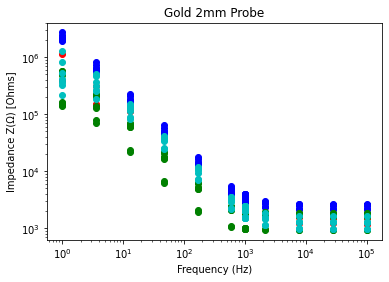

In [5]:
# Gold 2mm probe
print("gold 2mm ---")
for i in range(4):
    vals = make_excel_array(gold_files[i])
    print(gold_files[i])
    plt.plot(vals[0], vals[1],'ro',label="Gold 2mm")

print("gold 1mm ---")
# Gold 1mm probe
for i in [4,5,6,7,8,9,10]:
    vals = make_excel_array(gold_files[i])
    plt.plot(vals[0], vals[1],'bo', label="Gold 1mm")
    print(gold_files[i])
    
print("silver 2mm ---")
# Silver 2mm probe
for i in range(8):
    vals = make_excel_array(silver_files[i])
    print(silver_files[i])
    plt.plot(vals[0], vals[1],'go', label="Silver 2mm")
    
print("silver 1mm ---")
# Silver 1mm probe
for i in [9,10,11,12,13,14,15]:
    vals = make_excel_array(silver_files[i])
    print(silver_files[i])
    plt.plot(vals[0], vals[1],'co',label="Silver 1mm")
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Gold 2mm Probe")
# plt.legend()
plt.show()

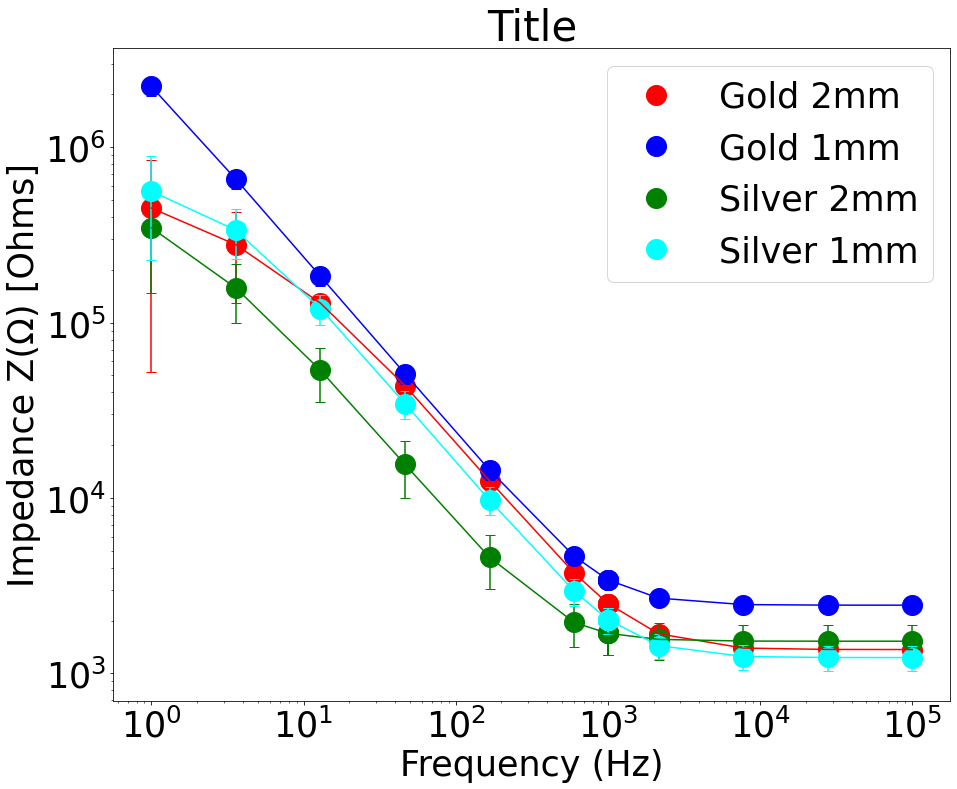

In [6]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

# Gold 2mm probe
color = "red"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Gold 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

# Gold 1mm probe

color = "blue"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Gold 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
# # Silver 2mm probe
color = "green"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Silver 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
# Silver 1mm probe
color = "cyan"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Silver 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Title")
plt.legend()
plt.show()

4


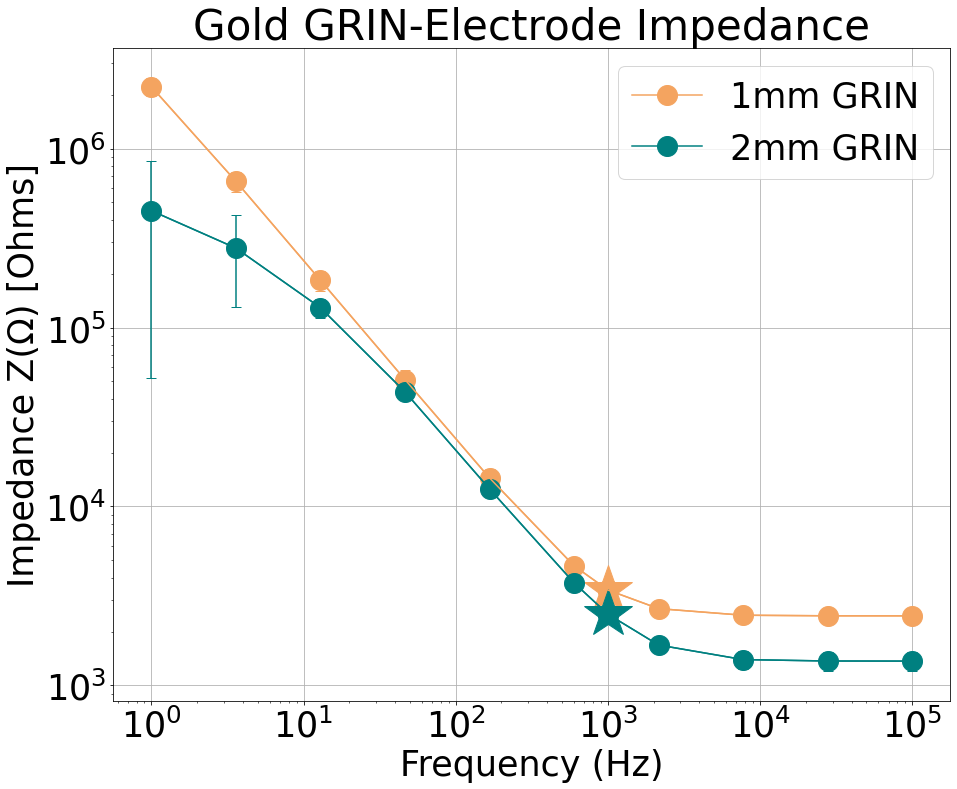

In [7]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Gold GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

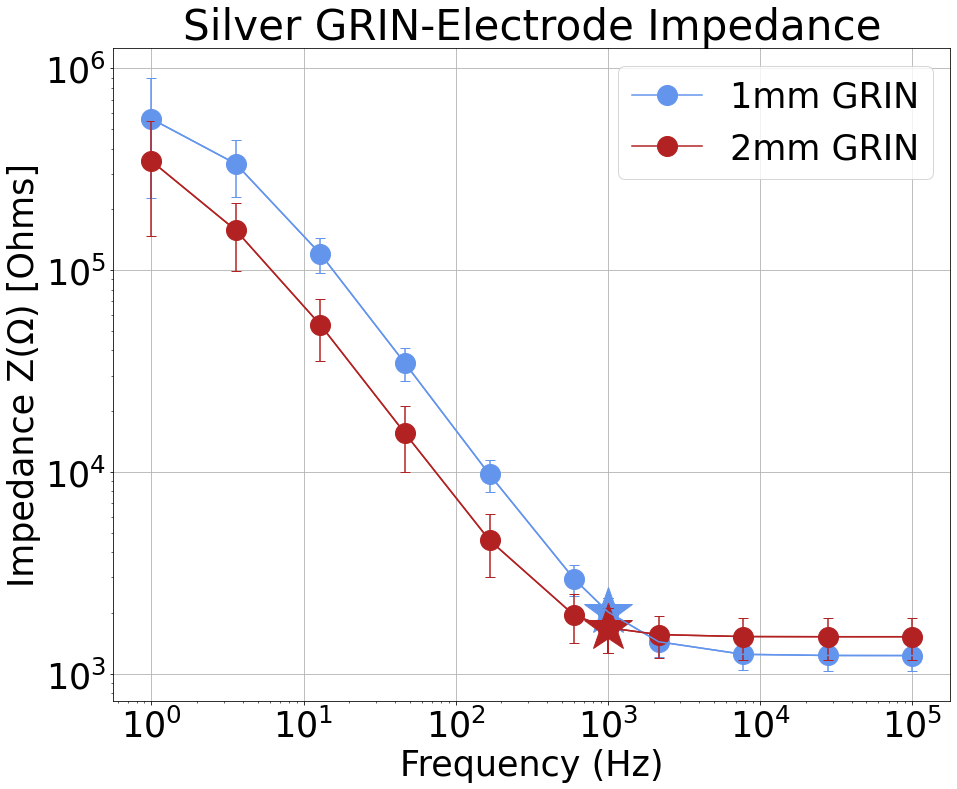

In [8]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})
    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

    
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Silver GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

## JOINT FIGURE

In [9]:
std[1][4]

422.54814828129327

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


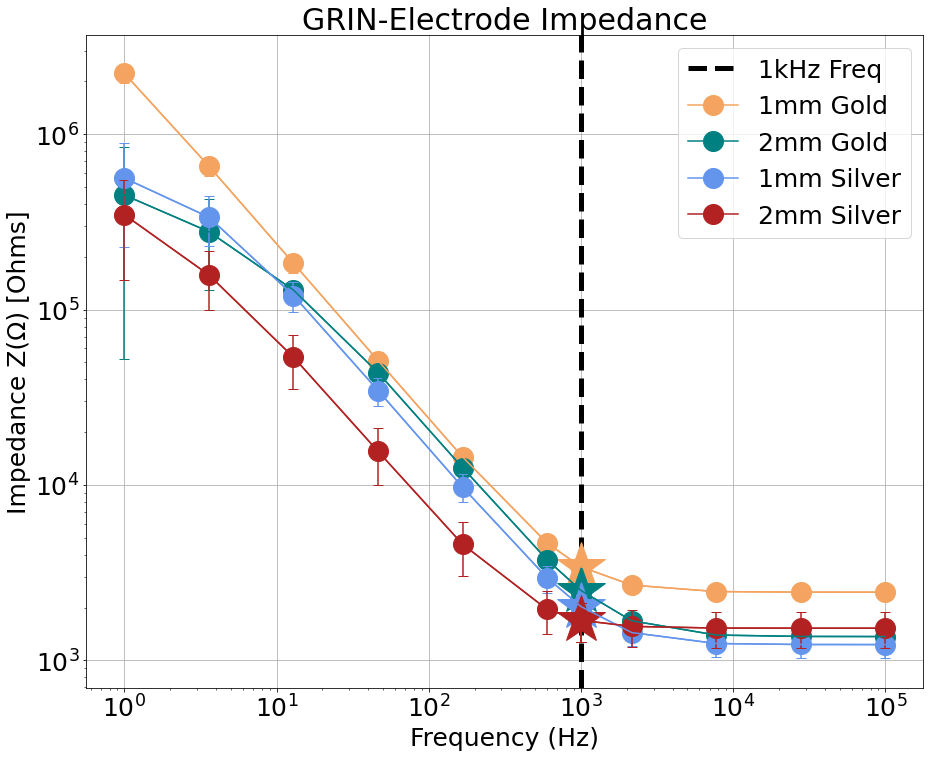

In [10]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25})

plt.axvline(x=1000, linestyle='dashed', color="black", linewidth=5, label="1kHz Freq")

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


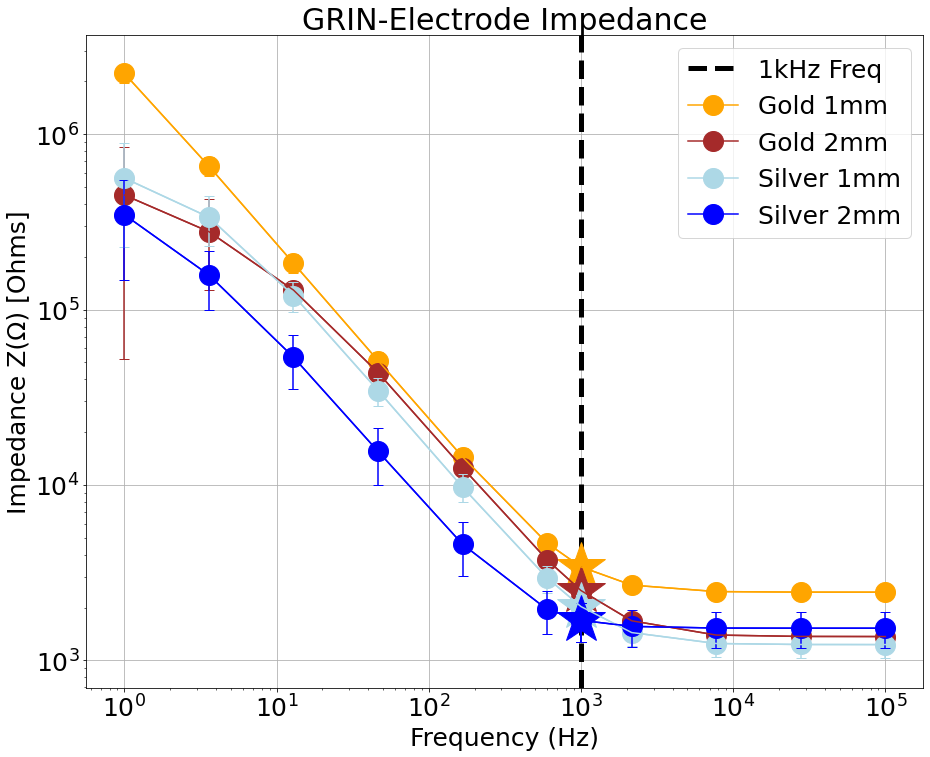

In [11]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25})

plt.axvline(x=1000, linestyle='dashed', color="black", linewidth=5, label="1kHz Freq")

# Gold 1mm probe

color = "orange"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Gold 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "brown"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Gold 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "lightblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Silver 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "blue"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Silver 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

In [12]:
## Plotting Various files at once

plot_electrodes(files[0:4])
format_log_plot()

NameError: name 'files' is not defined

In [ ]:
## Electrode numbers that I care about

silver_fn_2mm = np.array(["probe-3-electrode-1", "probe-3-electrode-3", "probe-3-electrode-5", "probe-3-electrode-7"])
silver_fn_1mm = np.array(["probe-4-electrode-1", "probe-4-electrode-2", "probe-4-electrode-3", "probe-4-electrode-4"])

gold_fn_2mm = np.array(["probe-1-electrode-6", "probe-1-electrode-7"])
gold_fn_1mm = np.array(["probe-2-electrode-1", "probe-2-electrode-2", "probe-2-electrode-3"])


# Silver

# probe-3-electrode-1
# probe-3-electrode-3
# probe-3-electrode-5
# probe-3-electrode-7

# probe-4-electrode-1
# probe-4-electrode-2
# probe-4-electrode-3
# probe-4-electrode-4

# Gold
# probe-1-electrode-6
# probe-1-electrode-7

# probe-2-electrode-1
# probe-2-electrode-2
# probe-2-electrode-3

In [ ]:
def average_impedance_data(a, color="blue", label=""):
    # input is data

    unique = np.unique(a[0])
    averaged = np.zeros((3,len(unique)))

    for i in range(len(unique)):
        averaged[0][i] = unique[i]
        averaged[1][i] = np.mean(a[1][np.where(a[0] == unique[i])])
        averaged[2][i] = np.std(a[1][np.where(a[0] == unique[i])])
    
    plt.errorbar(averaged[0], averaged[1], averaged[2], ecolor="red")
    plt.plot(averaged[0], averaged[1], marker="o", c=color, label=label,markersize=20)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance Z(Ω) [Ohms]")

    return averaged

In [ ]:
gold_data_E6 = np.concatenate(make_excel_array(gold_files[0]), make_excel_array(gold_files[1])) 
# gold_data_E7 = make_excel_array(gold_files[0]), 

# average_impedance_data([x,y])

In [ ]:
# polyimide = make_excel_array(files[0])
# print(np.shape(polyimide))

# silver_1 = make_excel_array(files[3])
# silver_2 = make_excel_array(files[11])
                            
# silver = []
# silver.append(np.append(silver_1[0], silver_2[0]))
# silver.append(np.append(silver_1[1], silver_2[1]))
# print(np.shape(silver))

# gold_1 = make_excel_array(files[5])
# gold_2 = make_excel_array(files[7])
# gold_3 = make_excel_array(files[9])

# gold = []
# gold.append(np.append(gold_1[0], [gold_2[0], gold_3[0]]))
# gold.append(np.append(gold_1[1], [gold_2[1], gold_3[1]]))
# print(np.shape(gold))

In [ ]:
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

avg_polyimide = average_impedance_data(polyimide, "red", "Polyimide")
avg_silver = average_impedance_data(silver, "Blue", "Silver")
avg_gold = average_impedance_data(gold, "Gold", "Gold")

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Sampling Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.grid()
plt.legend()

# PLOT STARS
plt.axvline(x=1000, linestyle='dashed', color="green", linewidth=10, label="1kHz")

plt.plot(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)], marker="*", color="red", markersize=50)
plt.plot(1000, avg_silver[1][np.where(avg_silver[0] == 1000)], marker="*", color="blue", markersize=50)
plt.plot(1000, avg_gold[1][np.where(avg_gold[0] == 1000)], marker="*", color="gold", markersize=50)



In [ ]:
print(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)])
print(1000, avg_silver[1][np.where(avg_silver[0] == 1000)])
print(1000, avg_gold[1][np.where(avg_gold[0] == 1000)])

m = avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]
sd = avg_polyimide[2][np.where(avg_polyimide[0] == 1000)]

print("Polyimide")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")

m = avg_silver[1][np.where(avg_silver[0] == 1000)]
sd = avg_silver[2][np.where(avg_silver[0] == 1000)]
print("Silver")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


m = avg_gold[1][np.where(avg_gold[0] == 1000)]
sd = avg_gold[2][np.where(avg_gold[0] == 1000)]
print("Gold")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


In [ ]:
avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]

# Plot ALL electrodes at once

In [ ]:
# # Plot ALL electrodes at once

# files = get_files()

# plt.figure(figsize=(15,8))
# plot_sample(files, 'electrode1-', color='bo-', label="Electrode 1")
# plot_sample(files, 'electrode2-', color='ro-', label="Electrode 2")
# plot_sample(files, 'electrode3-', color='go-', label="Electrode 3")
# plot_sample(files, 'electrode4-', color='co-', label="Electrode 4")
# plot_sample(files, 'electrode5-', color='mo-', label="Electrode 5")
# plot_sample(files, 'electrode6-', color='yo-', label="Electrode 6")

# plt.title("Impedance (Z) of all electrodes at varying depths")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Impedance Z(Ω) [Ohms]")
# plt.legend()
# format_log_plot()

# # plt.savefig('Z-sweep-all-electrodes.png')
# plt.show()


# Look at data across a single electrode

In [ ]:

    
# def plot_freq_z_phase_single_sample(fname,title=""):
#     vals = make_excel_array(fname)
#     plt.subplot(1,2,1)
#     plt.plot(vals[0], vals[1],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)
    
#     plt.subplot(1,2,2)
#     plt.plot(vals[0], vals[2],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Phase (Theta)")
#     plt.title(title)
    
#     plt.show()
    
# # Plot with different y-axes
# # def plot_freq_z_phase(file_list, electrode_name, color='o', label=""):
# #     # makes a plot of relevant electrodes e.g. electrode1
# #     # specify color b, r, c, m, y, b, w
# #     label_flag = True
# #     fig, ax1 = plt.subplots()
# #     ax1.set_xlabel('Frequency (Hz)')
# #     color = 'tab:red'
# #     ax1.plot(t, data1, color=color)
# #     ax1.set_ylabel('Impedance Z(Ω) [Ohms]', color=color)
# #     ax1.tick_params(axis='y', labelcolor=color)
    
# #     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# #     color = 'tab:blue'
# #     ax2.plot(t, data2, color=color)
# #     ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# #     ax2.tick_params(axis='y', labelcolor=color)
# #     fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #     plt.show()

    
# def find_num_in_fname(word, qry):
#     s = word.find(qry) 
#     start = s + len(qry)
#     stop = word.find('mm')
#     if (s == -1 or stop == -1):
#         return -1
#     return int(word[start:stop])
        
# def get_electrode_data(electrode_name, file_list):
#     z_vals = []
#     freqs = []
#     depths = []
#     phase_vals = []
    
#     for fname in file_list:
#         if electrode_name in fname:
#             vals = make_excel_array(fname)
#             if len(vals[0]) == 19:
#                 z_vals.append(vals[1])
#                 phase_vals.append(vals[2])
#                 dep = find_num_in_fname(fname, electrode_name)
#                 if dep != -1:
#                     depths.append(dep)
#                 if freqs == []:
#                     freqs = vals[0]
                    
#     if (len(z_vals) != len(depths)):
#         print("Error in get_electrode_data - incongruent number of samples")
        
#     return freqs, z_vals, depths, phase_vals

# def plot_electrode_data(freqs, z_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.title(title)
        
# def plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     z_vals_new = []
#     phase_vals_new = []
    
#     depths = np.array(depths)
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     for i in index_sort:
#         z_vals_new.append(z_vals[i])
#         phase_vals_new.append(phase_vals[i])
        
#     z_vals = z_vals_new
#     phase_vals = phase_vals_new
    
#     plt.figure(figsize=(20,8))
#     plt.subplot(1,2,1)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.legend(title="Electrode Depth (mm)")
#         plt.title(title)
        
    
#     plt.subplot(1,2,2)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, phase_vals[i], '-x', label=depths[i])
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Phase (Theta)")
#         plt.title(title)
        
# #     plt.show()
   
        
# def plot_electrode_errors(freqs, z_vals, title=""):
#     plt.errorbar(freqs, np.mean(z_vals, axis=0), yerr=np.std(z_vals, axis=0))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)

In [ ]:
# plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])

# Plot Error Bars of Each Electrode Across Frequency

In [ ]:
# # freqs, z_vals, depths = get_electrode_data("electrode1-", files)
# # plot_electrode_data(freqs, z_vals, depths, color='-o',title="Electrode 1")
# # plot_electrode_errors(freqs, z_vals, title="Electrode 1"):

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Each Electrode Separately
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_data(freqs, z_vals, depths, color='-o',title=e_titles[i])
# plt.suptitle("Plot of Each Electrode Z across Frequency", fontsize=20)

# # plt.savefig('z-sweep-subplots.png')

# plt.show()

In [ ]:
# # Each Electrode Error Bars
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_errors(freqs, z_vals, title=e_titles[i])
# plt.suptitle("Plot of Mean Electrode Z across Frequency w/ Error Bars", fontsize=20)

# # plt.savefig('z-sweep-error-bars.png')

# plt.show()

# Get Z at freq = 1k for all samples to compare electrode depths

In [ ]:
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)

#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]

#     assert((sorted(depths) == depths).all())
    
#     plt.subplot(3, 2, i+1)
#     plt.plot(depths, z_1k,'o-')
#     plt.title(e_titles[i])
#     plt.xlabel("Depth at measurement (mm)")
#     plt.ylabel("Impedance Z (Ohms)")

# plt.suptitle("Plot of 1k (Hz) Impedance at varying electrode depths", fontsize=20)

# # plt.savefig('1k-z-subplots.png')

# plt.show()

# Compare 1k Z mean and stdev on same plot

In [ ]:
# all_1k_z = []
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)
#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]
#     all_1k_z.append(z_1k)

In [ ]:
# means = np.zeros((len(all_1k_z), 1))
# stds = np.zeros((len(all_1k_z), 1))

# for i in range(len(all_1k_z)):
#     means[i] = np.mean(all_1k_z[i]) 
#     stds[i] = np.std(all_1k_z[i])
    
# means = means.flatten()/1000
# stds = stds.flatten()/1000
# plt.figure(figsize=(10,8))
# plt.bar([1,2,3,4,5,6], means, yerr=stds, capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot.png')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,8))
# plt.bar(["1","2","3"], means[0:3], yerr=stds[0:3], color="m", capsize=10)
# plt.bar(["5","6"], means[5:6], yerr=stds[5:6], color="m", capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot-remove4.png')
# plt.show()


# Plot Electrode Data and Phase

In [ ]:

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Display by Electrode
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, phase_vals = get_electrode_data(electrodes[i], files)
#     plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])
#     plt.savefig(electrodes[i] + 'z-phase.png')
#     plt.show()



In [ ]:
# depths=np.array(depths)
# depths[np.argsort(depths)]

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


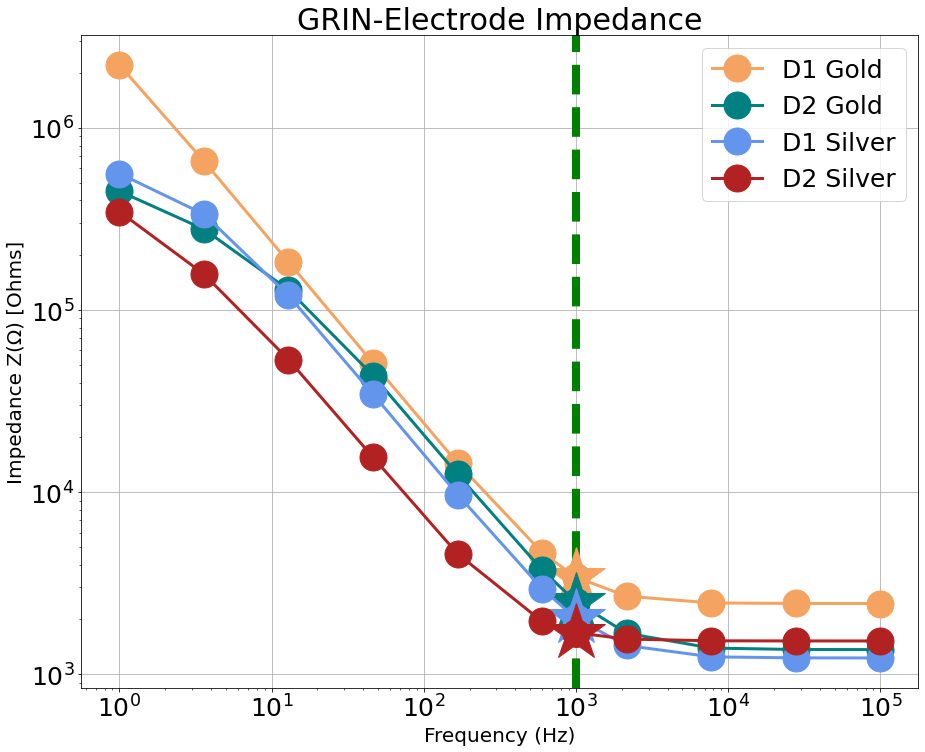

In [28]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25, 'axes.labelsize': 20})

# plt.rcParams.update({'axes.labelsize': 14, 'axes.titlesize': 16})


plt.axvline(x=1000, linestyle='dashed', color="green", linewidth=8)

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

lw = 3
ms = 27
star = 60


np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D1 Gold",markersize=ms,linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D2 Gold",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D1 Silver",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D2 Silver",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()


plt.savefig("compare-grin-planar-impedance", dpi=300)


plt.show()

colors = ["sandybrown", "teal", "cornflowerblue", "firebrick"]